In [8]:
import numpy as np
import torch
import os
import pandas as pd

In [5]:
# Ruta del directorio que contiene los archivos .pt
embeddings_dir = "curated_dataset/individual_embeddings_original"

# Inicializar el diccionario para almacenar los embeddings
embeddings_dict = {}
count = 0
# Iterar sobre los archivos .pt en el directorio
for filename in os.listdir(embeddings_dir):
    count = count + 1
    # Obtener el ID de la secuencia desde el nombre del archivo
    sequence_id = filename.split(".pt")[0]

    # Cargar el tensor de embedding desde el archivo .pt
    embedding = torch.load(os.path.join(embeddings_dir, filename))

    # Agregar el embedding al diccionario con el ID de la secuencia como clave
    
    embeddings_dict[sequence_id] = embedding
    if count == 2:
        print("sequence_id", sequence_id)

# Ahora tienes un diccionario con los embeddings cargados y listos para su uso
len(embeddings_dict)

sequence_id A0A5E4HS15.1


35854

In [6]:
# Suponiendo que embeddings_dict es tu diccionario


# Iterar sobre los primeros 10 elementos del diccionario
for i, (key, value) in enumerate(embeddings_dict.items()):
    print(f"{key}: {value}")
    print("len", value.shape)
    if i >= 2:
        break



A0A0F6AC62.1: tensor([[ 0.2372, -0.1559,  0.1103,  ...,  0.3969, -0.5825, -0.0428],
        [-0.3194, -0.1705, -0.0451,  ...,  0.3626,  0.0815, -0.1895],
        [ 0.0437, -0.1727,  0.3814,  ...,  0.1214, -0.1519,  0.0835],
        ...,
        [-0.2321, -0.0523, -0.0148,  ...,  0.4848, -0.0748,  0.2708],
        [ 0.1027, -0.2259,  0.1735,  ..., -0.1111, -0.0759, -0.2376],
        [ 0.2237, -0.1295,  0.1406,  ..., -0.0047, -0.1700, -0.3562]],
       requires_grad=True)
len torch.Size([50, 320])
A0A5E4HS15.1: tensor([[ 0.0776,  0.5679,  0.3548,  ...,  1.2091,  0.3872, -0.2083],
        [ 0.0622, -0.4613,  0.2075,  ...,  0.0323, -0.0510,  0.2340],
        [-0.0388, -0.2371, -0.1866,  ..., -0.0708,  0.2436,  0.1552],
        ...,
        [ 0.0591,  0.0199, -0.1469,  ..., -0.0629,  0.0126, -0.2372],
        [ 0.2729,  0.2205, -0.2491,  ...,  0.0683,  0.0939, -0.4274],
        [-0.0058,  0.2432,  0.0837,  ..., -0.0527, -0.3397, -0.0704]],
       requires_grad=True)
len torch.Size([42, 320]

In [14]:
def get_conservation_scores(csv_file):
    # Charger le CSV
    df = pd.read_csv(csv_file, delimiter=',', names=[
                     'sequence id', 'conservation score'], header=0)
    sequences = df['sequence id'].values
    conservation_scores = df['conservation score'].apply(lambda x: np.array(
    [float(i) if i != 'nan' else 0.0 for i in x.split()], dtype=np.float32)).values
    #print("conservation_scores", conservation_scores)

    return sequences, conservation_scores

sequences, conservation_scores_array = get_conservation_scores('curated_dataset/filtered_conservation_scores_35854.csv')

In [16]:
conservation_scores_array[1].shape

(200,)

este codigo de abajo contiene errores

embedding tensor([[[ 0.0176,  0.1588, -0.2488,  ...,  0.4673, -0.1673, -0.0632],
         [-0.4563, -0.1866, -0.2088,  ...,  0.4631,  0.1327,  0.2293],
         [-0.4644,  0.3481, -0.2846,  ...,  0.6893, -0.1480, -0.0270],
         ...,
         [-0.0358, -0.3294,  0.0403,  ...,  0.4098, -0.0217, -0.1621],
         [ 0.0670,  0.1174,  0.6510,  ...,  0.7795,  0.1632, -0.0885],
         [-0.0039, -0.1201,  0.2366,  ...,  0.1408, -0.0495,  0.0045]]],
       grad_fn=<StackBackward0>)
embedding.shape torch.Size([1, 211, 320])
label tensor([[0.2150, 0.4602, 0.7354, 0.6953, 0.6519, 0.7490, 0.6836, 0.7012, 0.5166,
         0.3481, 0.7417, 0.5366, 0.4429, 0.2485, 0.4973, 0.4443, 0.1881, 0.2842,
         0.3096, 0.1375, 0.2144, 0.1776, 0.1274, 0.1837, 0.2108, 0.2346, 0.1384,
         0.1995, 0.0000, 0.2363, 0.2402, 0.2258, 0.3066, 0.1921, 0.2242, 0.0963,
         0.2258, 0.1464, 0.1993, 0.1848, 0.1017, 0.1089, 0.1760, 0.1995, 0.1534,
         0.1110, 0.1678, 0.1439, 0.1345, 0.1290, 0.1676, 0.229

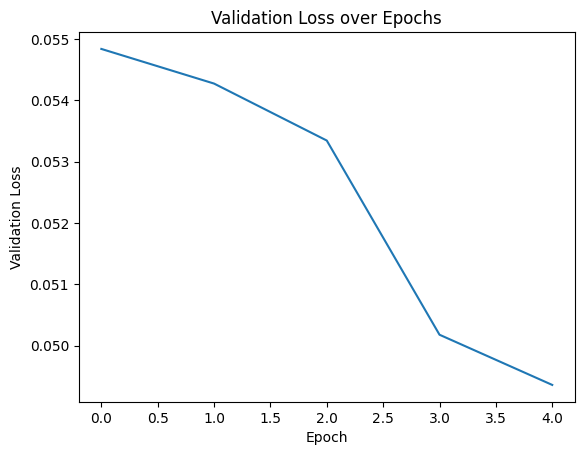

embedding.shape ev torch.Size([1, 117, 320])
label tensor([[0.1956, 0.1315, 0.1785, 0.1472, 0.4001, 0.2463, 0.3464, 0.1610, 0.2903,
         0.4414, 0.3943, 0.1636, 0.1044, 0.5479, 0.1444, 0.3611, 0.1248, 0.0892,
         0.1146, 0.1028, 0.3230, 0.1287, 0.1232, 0.1140, 0.2032, 0.3047, 0.0956,
         0.4006, 0.1454, 0.5278, 0.1431, 0.5112, 0.0975, 0.1781, 0.1378, 0.0000,
         0.1362, 0.2411, 0.1176, 0.4719, 0.1451, 0.5181, 0.1043, 0.3508, 0.1215,
         0.1389, 0.0858, 0.1515, 0.0000, 0.2234, 0.5010, 0.3767, 0.6650, 0.1450,
         0.3767, 0.2126, 0.1230, 0.0684, 0.1390, 0.0795, 0.2896, 0.1202, 0.6338,
         0.0956, 0.0995, 0.0901, 0.0972, 0.1221, 0.0482, 0.0475, 0.0475, 0.0715,
         0.3855, 0.1892, 0.2671, 0.0000, 0.0331, 0.1028, 0.0610, 0.1099, 0.1832,
         0.6357, 0.2825, 0.5151, 0.3035, 0.5977, 0.4087, 0.2358, 0.2257, 0.4099,
         0.0927, 0.1709, 0.1970, 0.4907, 0.3696, 0.7559, 0.4995, 0.8345, 0.2661,
         0.6172, 0.2722, 0.3308, 0.0657, 0.1368, 0.0945, 0

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import matplotlib.pyplot as plt

# Define your datasets (train, validation, test)
dataset = [(embeddings_dict[sequence.split("/")[0]], conservation_scores) for sequence, conservation_scores in zip(sequences[:100], conservation_scores_array[:100])]
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
    dataset, [train_size, val_size, test_size])

# Create data loaders for train, validation, and test
train_loader = data.DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = data.DataLoader(val_dataset, batch_size=1, shuffle=False)
test_loader = data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# Define your model
class LinearRegression(nn.Module):
    def __init__(self, input_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# Define training function
def train_model(model, optimizer, loss_fn, data_loader):
    model.train()
    for embedding, label in data_loader:
        optimizer.zero_grad()
        output = model(embedding).squeeze()
        loss = loss_fn(output, label)
        print("embedding", embedding)
        print("embedding.shape", embedding.shape)
        print("label", label)
        print("labelshape", label.shape)
        
        print("output", output)
        print("output.shape", output.shape)
        loss.backward()
        optimizer.step()

# Define evaluation function
def evaluate_model(model, loss_fn, data_loader):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for embedding, label in data_loader:
            output = model(embedding).squeeze()
            print("embedding.shape ev", embedding.shape)
            print("label", label)
            print("labelshape", label.shape)
            
            print("output", output)
            print("output.shape", output.shape)
            loss = loss_fn(output, label)
            running_loss += loss.item()
    return running_loss / len(data_loader)

# Initialize the model, loss function, and optimizer
model = LinearRegression(input_size=320)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Train the model
num_epochs = 5
val_losses = []
for epoch in range(num_epochs):
    train_model(model, optimizer, loss_fn, train_loader)
    val_loss = evaluate_model(model, loss_fn, val_loader)
    val_losses.append(val_loss)
    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss}')

# Plot validation loss over epochs
plt.plot(val_losses)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs')
plt.show()

# Finally, evaluate on test set
test_loss = evaluate_model(model, loss_fn, test_loader)
print(f'Test Loss: {test_loss}')

este es el codigo anterior con solo 1000 secuencias

In [25]:
from torch.utils.data import DataLoader, TensorDataset
# Fonction pour obtenir les embeddings correspondant aux séquences
def get_embeddings(sequences, embeddings_dict):
    embeddings = []
    for sequence_id in sequences:
        embedding = embeddings_dict[sequence_id]
        print(embedding)
        embeddings.append(embedding)
    embeddings = torch.stack(embeddings)
    return embeddings

def get_embedding(sequence_id, embeddings_dict):
    return embeddings_dict[sequence_id]


# Fonction pour entraîner le modèle en utilisant la descente de gradient stochastique (SGD)
def train_model_stochastic(model, optimizer, loss_fn, sequences, conservation_scores):
    model.train()
    for i in range(len(sequences)):
        sequence_id = sequences[i]
        if i == len(sequences) - 1:
            print("sequence_id", sequence_id)
            print("embedding", embedding)
        embedding = get_embedding(sequence_id, embeddings_dict)
        #embedding_tensor = torch.tensor(embedding, dtype=torch.float32)
        label = torch.tensor(conservation_scores[i], dtype=torch.float32)

        optimizer.zero_grad()
        output = model(embedding).squeeze()

        
        loss = loss_fn(output, label)
        print("loss", loss)
        loss.backward()
        optimizer.step()
        if i == len(sequences) - 1 or False:
            print("label shape", label.shape)
            print("label", label)
            print("embedding shape", embedding.shape)
            print("embedding", embedding)
            print("output shape", output.shape)
            print("output", output)
            



# Définir les modèles de régression linéaire, Multi layer perceptron

class LinearRegression(nn.Module):
    def __init__(self, input_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)


# Évaluation du modèle sur l'ensemble de validation
def evaluate_model(model, loss_fn, data_loader):
    running_loss = 0.

    with torch.no_grad():
        for i, data in enumerate(data_loader):
            inputs, labels = data

            outputs = model(inputs)

            loss = loss_fn(outputs, labels)

            running_loss += loss.item()

    return running_loss / len(data_loader)

# Configuration des hyperparamètres
learning_rate = 0.001
num_epochs = 5
batch_size = 1


# Créer l'ensemble de données
dataset = [(embeddings_dict[sequence.split("/")[0]], conservation_scores) for sequence, conservation_scores in zip(sequences[:10], conservation_scores_array[:10])]
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Créer les data loaders
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)



# Initialiser le modèle, la fonction de perte et l'optimiseur
model = LinearRegression(input_size=320)
#model = MLP(input_size=320, hidden_size=64, output_size=1)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

val_losses = []
# Entraînement du modèle
for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}:')
    model.train()
    train_model_stochastic(model, optimizer, loss_fn,
                           sequences, conservation_scores_tensors)

    # Validation du modèle
    model.eval()
    val_loss = evaluate_model(model, loss_fn, val_loader)
    val_losses.append(val_loss) 
    #print(f'Validation Loss: {val_loss}')
# on trace la perte de validation au fil des époques
plt.plot(val_losses)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs')
plt.show()

Epoch 1/5:


KeyError: 'A0A009J727.1/56-242'

In [ ]:
import pandas as pd
if False:
    # Leer el archivo CSV
    csv_file = "curated_dataset/conservation_scores_formated.csv"
    df = pd.read_csv(csv_file)
    
    # Filtrar las filas del DataFrame basado en las claves del diccionario
    filtered_rows = []
    for index, row in df.iterrows():
        sequence_id = row["sequence id"].split("/")[0]  # Obtener el prefijo de la secuencia ID
        if sequence_id in embeddings_dict:
            print("coincidencia encontrada", sequence_id)
            filtered_rows.append(row)
    
    # Crear un nuevo DataFrame con las filas filtradas
    filtered_df = pd.DataFrame(filtered_rows)
    
    # Guardar el DataFrame filtrado en un nuevo archivo CSV
    filtered_csv_file = "curated_dataset/filtered_conservation_scores.csv"
    filtered_df.to_csv(filtered_csv_file, index=False)
    
    print("Filtrado completado. El archivo filtrado se ha guardado como:", filtered_csv_file)


In [ ]:
from transformers import AutoTokenizer, EsmModel
import torch
from Bio import SeqIO
import os

# Cargar el tokenizador y el modelo
tokenizer = AutoTokenizer.from_pretrained("facebook/esm2_t6_8M_UR50D")
model = EsmModel.from_pretrained("facebook/esm2_t6_8M_UR50D")

# Función para generar los embeddings vectors de una secuencia


def generate_embedding(sequence):
    inputs = tokenizer(sequence, return_tensors="pt")
    outputs = model(**inputs)
    # Squeeze para eliminar la dimensión de lote
    embedding = outputs.last_hidden_state.squeeze(0)
    # Eliminar la primera y última fila
    embedding = embedding[1:-1, :]
    return embedding


# Crear directorio para almacenar los embeddings

# Leer el archivo fasta y procesar las secuencias
fasta_file = "curated_dataset/reduced_input_20000.fasta"
count = 0
if False:
    for record in SeqIO.parse(fasta_file, "fasta"):
        count = count + 1
        sequence_id = record.id.split('/')[0]
        # sequence_id = sequence_id.replace('.', '')
        sequence_id_complement = record.id.split('/')[1]
        sequence = str(record.seq)
    
        # Generar el embedding para la secuencia actual
        embedding = generate_embedding(sequence)
        output_file = f"curated_dataset/individual_embeddings/{sequence_id}.pt"
        # os.makedirs(os.path.dirname(output_file), exist_ok=True)
        # Guardar el embedding en un archivo .pt dentro del directorio de la secuencia
        torch.save(embedding, output_file)
    
        print(
            f"Embedding {count} generado y guardado para la secuencia {sequence_id}")

    print("Proceso completado.")
